In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/data/gdsc/moblieNet_Large_train_99_val_96.h5')

- 데이터를 바꾸고 모델을 moblienet-v3버전을 사용했다.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 MobilenetV3large (Functiona  (None, 1, 1, 1280)       4226432   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_2 (Dense)             (None, 1024)              104960

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf

def image_pre(url):
  images = load_img(url) # 이미지 로드
  images = images.resize((160, 160)) # 모델이 받는 이미지가 160x160이니...
  plt.imshow(images)
  images = np.array(images) # 이미지를 행렬화
  images = np.reshape(images, (160,160,3)) # 너비, 높이, 채널로 image shape를 맞춰주고
  images = tf.expand_dims(images, axis = 0) # 모델이 받는건 (None, 160, 160, 3)으로 된 tensor이니 변경 -> 기억해두자ㅠ 찾는데 오래걸렸네
  return images

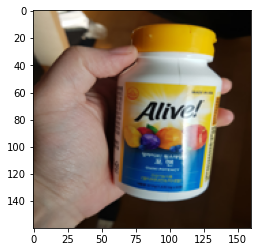

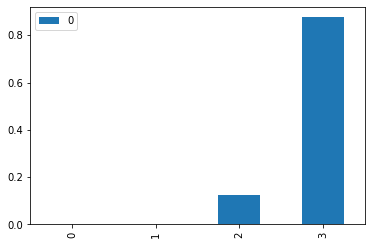

In [ ]:
one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220121_130026660.jpg')
pred = model.predict(one)
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 3이면 plastic이네

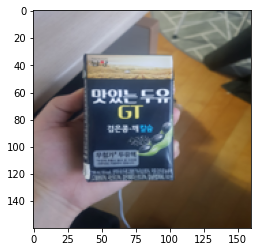

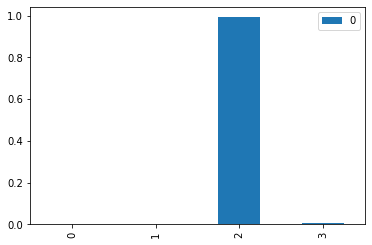

In [ ]:
two = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220120_172113590.jpg')
pred =(model.predict(two))
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 2이면 paper네

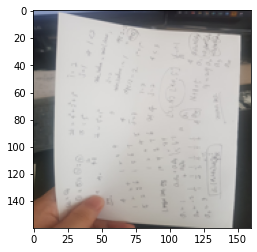

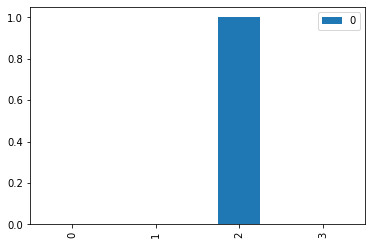

In [ ]:
three = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220121_132519261.jpg')
pred =(model.predict(three))
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 2이면 paper네

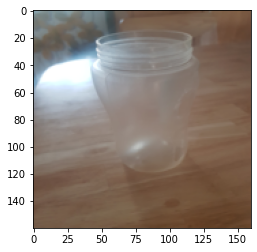

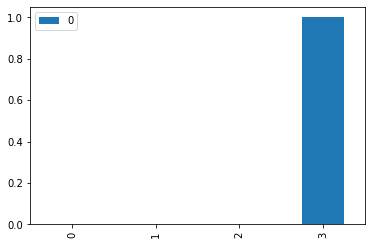

In [ ]:
three = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220121_133722854_05.jpg')
pred =(model.predict(three))
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 3이면 플라스틱!

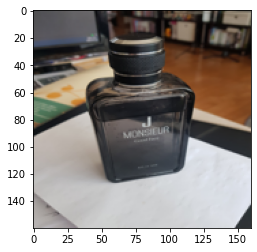

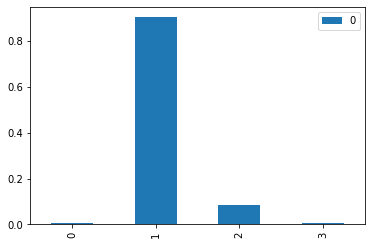

In [ ]:
three = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220121_142029998.jpg')
pred =(model.predict(three))
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 1이면 glass 
# 후... 어느정도 인식이 잘되는거같네

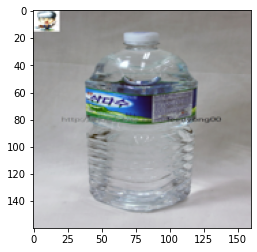

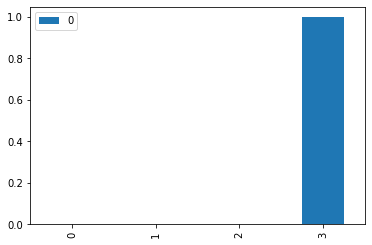

In [ ]:
one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220122_193731069.jpg')
pred = model.predict(one)
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']
# 3이면 plastic이네

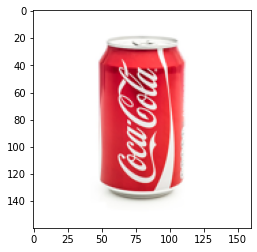

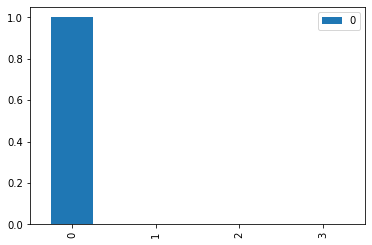

In [ ]:
one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220122_193731069_02.jpg')
pred = model.predict(one)
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']

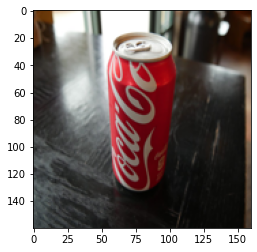

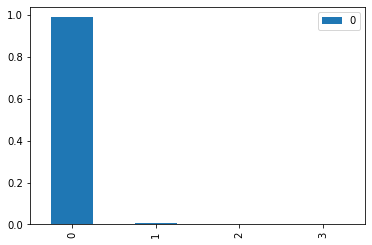

In [ ]:
one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220122_193731069_03.jpg')
pred = model.predict(one)
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']

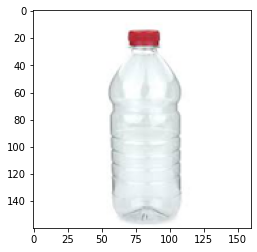

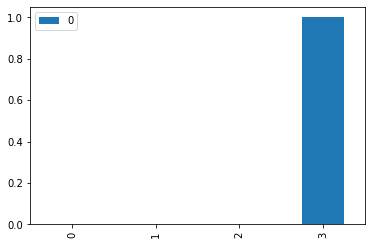

In [ ]:
one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220122_193731069_01.jpg')
pred = model.predict(one)
pd.DataFrame(pred).T.plot(kind = 'bar')
# class_names = ['can', 'glass', 'paper', 'plastic']

In [ ]:
# tflite로 예측해야하니까 image_pre를 다시 정의

def image_pre(url):
  images = load_img(url) # 이미지 로드
  images = images.resize((160, 160)) # 모델이 받는 이미지가 160x160이니...
  plt.imshow(images)
  images = np.array(images, dtype = np.float32) # 이미지를 행렬화
  images = np.reshape(images, (160,160,3)) # 너비, 높이, 채널로 image shape를 맞춰주고
  return images


# tflite를 python에서 예측

one = image_pre('/content/drive/MyDrive/data/gdsc/test/KakaoTalk_20220122_193731069_01.jpg')

interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/data/gdsc/moblieNet_Large_train_99_val_96.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], [one])
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
# 모델에서 중간에 있는 layer를 제거할때 유용하게 사용되네
# 왜 layer를 제거하려고 했지? -> input쪽에 input_layer랑 Sequential랑 같이 묶여있으면 pb로 변환이 안됨 -> 모델을 재설계 하던지 둘중 하나를 layer를 없애줘야함

drop_layers = [1] # 제거할 layer의 인덱스

input_layer = x = model.input

for i, layer in enumerate(model.layers[1:], 1):
    if i not in drop_layers:
        x = layer(x)

cnnModel = tf.keras.models.Model(inputs = input_layer, outputs = x) # 모델재구축
cnnModel.save('/content/drive/MyDrive/data/gdsc/mbs.h5') # 모델저장

In [ ]:
# h5 -> pb로 변환

model = tf.keras.models.load_model('/content/drive/MyDrive/data/gdsc/mbs.h5', compile=False)

export_path = './pb'
model.save(export_path, save_format="tf")

In [ ]:
# tflite로 저장~
saved_model_dir = './pb'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()
open('./converted_model.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: ./pb/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


- 프로젝트의 목표가 tflite로 모델포멧을 변경해서 모바일 어플리케이션과 연동하는것이다.
    - h5 -> tflite로 변경하는것에 대해 알게 되었다.
    - model의 layer를 넣는것만 해봤지 빼는 과정을 한번도 안해 봤기 때문에 시도해보았다.
    